In [0]:
import numpy as np
import copy
import math
import matplotlib.pyplot as plt

Determine triangle of maximum area that can fit into an ellipse.

Paramethers of genetic algorithm:

In [0]:
N = 50 # population
L = 36 # length of binary code (3x12)
pm = 0.001 # probability of mutation
pc = 0.9 # probability of crossover
G = 0.8 # generation gap

Paramethers of the ellipse:
(x/a)^2 + (y/b)^2 = 1

In [0]:
a = 15
b = 3

Plot of the ellipse:

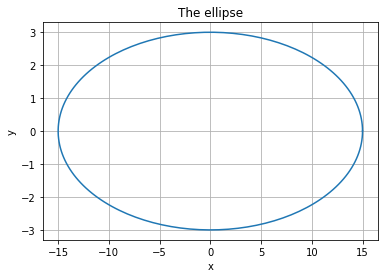

In [5]:
theta = np.linspace(0,2*math.pi,200)
ellipse_x = a*np.cos(theta)
ellipse_y = b*np.sin(theta)
plt.title('The ellipse')
plt.plot(ellipse_x, ellipse_y)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Each point of the triangle is encoded with 12 bits. Instead of coding each coordinate separately, the point is encoded with the corresponding angle (counterclockwise) because it is easier.
One chromosome consists of 36 bits - first 12 are for the first point, second 12 for the second and the rest are for the third point. 
Fitness function is the area of the triangle because we are maximizing it.

In [0]:
# Calculating x and y coordinates from triangle_chromosome
def calculate_coordinates(triangle_chromosome):
  angle1 = int(triangle_chromosome[0:12],2)/(2**12-1)*2*math.pi
  angle2 = int(triangle_chromosome[12:24],2)/(2**12-1)*2*math.pi
  angle3 = int(triangle_chromosome[24:36],2)/(2**12-1)*2*math.pi

  x1 = a*np.cos(angle1)
  x2 = a*np.cos(angle2)
  x3 = a*np.cos(angle3)

  y1 = b*np.sin(angle1)
  y2 = b*np.sin(angle2)
  y3 = b*np.sin(angle3)

  return x1, x2, x3, y1, y2, y3

In [0]:
def fitness_function(triangle_chromosome):
  x1, x2, x3, y1, y2, y3 = calculate_coordinates(triangle_chromosome)

  # Length of the sides of the triangle formed by points (x1, y1), (x2, y2) and (x3, y3)
  aa = np.sqrt((x2-x1)**2+(y2-y1)**2)
  bb = np.sqrt((x3-x1)**2+(y3-y1)**2)
  cc = np.sqrt((x2-x3)**2+(y2-y3)**2)

  # Calculating area of the triangle
  s = (aa+bb+cc)/2
  f = np.sqrt(s*(s-aa)*(s-bb)*(s-cc))
  return f

In [0]:
# Forms new generation of N instances by using roulette wheel algorithm.
def roulette_wheel(generation, fitness_functions, N):
  new_generation = []
  pop_cumsum = np.cumsum(areas)
  for i in range(N):
    tmp1 = np.random.random()*pop_cumsum[-1]
    tmp2 = pop_cumsum - tmp1
    # finding index of the first positive element
    choosen_ind = ((np.where(tmp2>0))[0])[0]
    new_generation.append(generation[choosen_ind])
  return new_generation

In [0]:
def crossover(generation, fitness_functions, N, pc):
  new_generation = []
  for i in range(round(N/2)):
    # Choosing parents
    parent1 = roulette_wheel(generation, fitness_functions, 1)[0]
    parent2 = roulette_wheel(generation, fitness_functions, 1)[0]

    # Choosing whether crossover will occur or not
    if np.random.random()<pc:
      crossover_point = np.random.randint(35)+1
      child1 = parent1[0:crossover_point] + parent2[crossover_point:]
      child2 = parent2[0:crossover_point] + parent1[crossover_point:]
    else:
      child1 = parent1
      child2 = parent2
    new_generation.append(child1)
    new_generation.append(child2)
  return new_generation

In [0]:
def change_char(s, p, r):
    return s[:p]+r+s[p+1:]

def plot_gen(generation, N, num_of_gen):
  theta = np.linspace(0,2*math.pi,200)
  ellipse_x = a*np.cos(theta)
  ellipse_y = b*np.sin(theta)
  plt.title('Generation number %i' %num_of_gen)
  plt.plot(ellipse_x, ellipse_y)
  for i in range(N):
    x1, x2, x3, y1, y2, y3 = calculate_coordinates(generation[i])
    plt.plot([x1, x2, x3, x1], [y1, y2, y3, y1])

  plt.grid()
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()

Genetic algorithm:

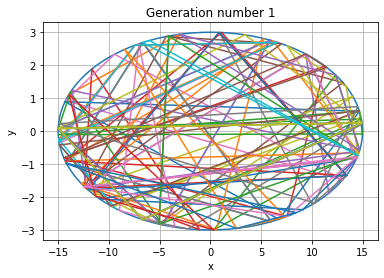

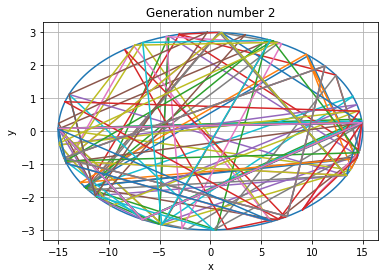

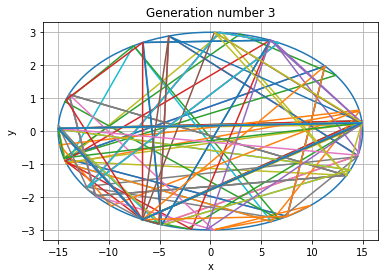

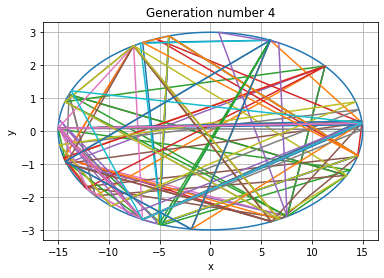

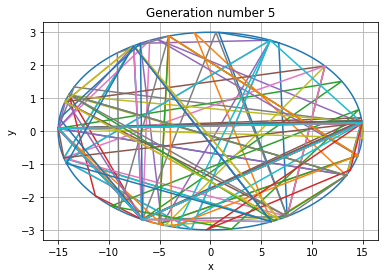

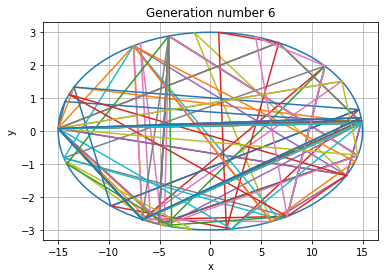

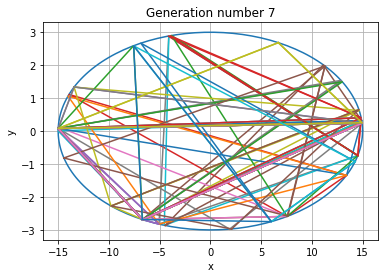

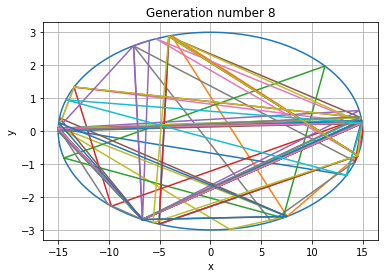

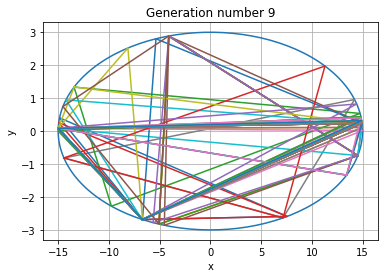

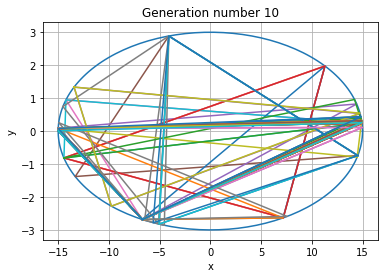

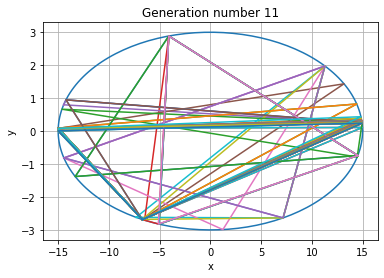

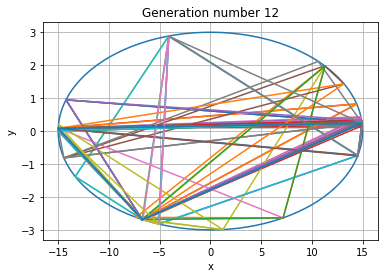

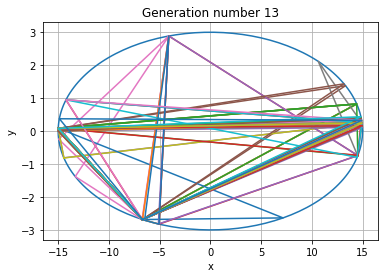

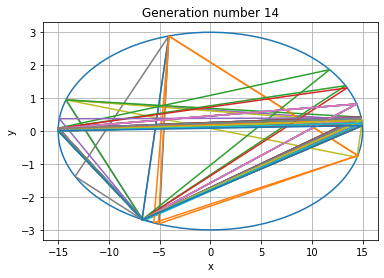

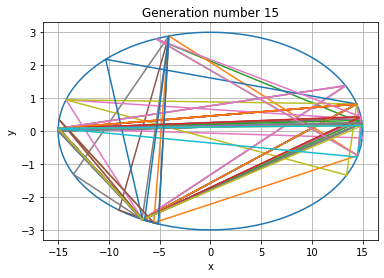

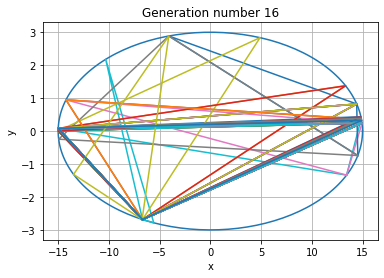

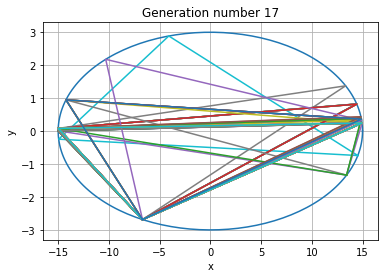

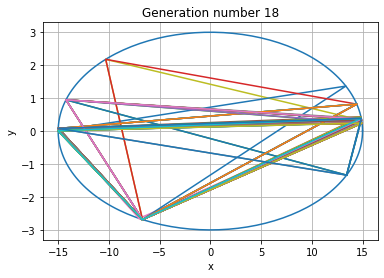

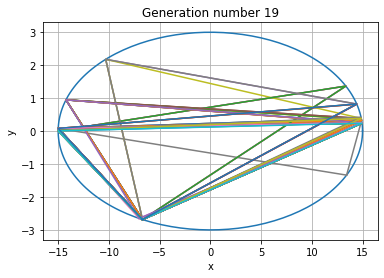

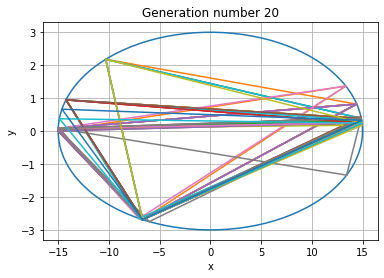

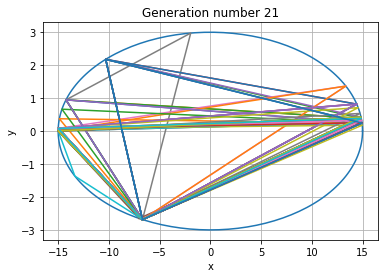

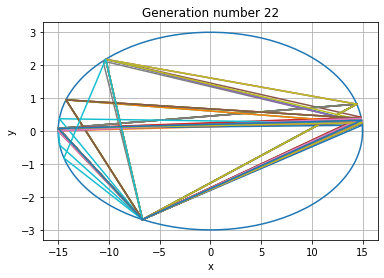

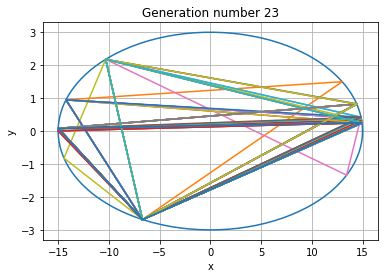

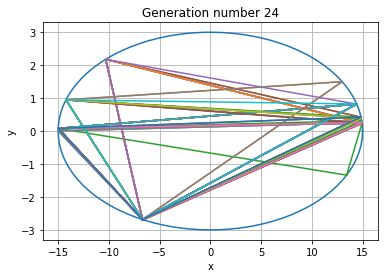

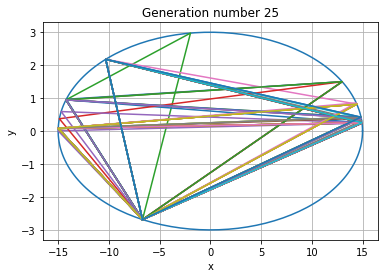

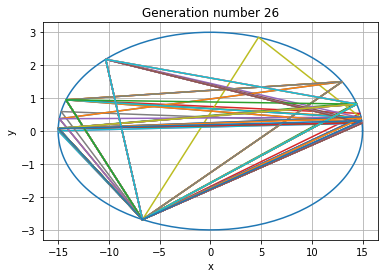

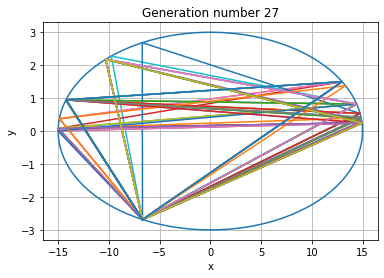

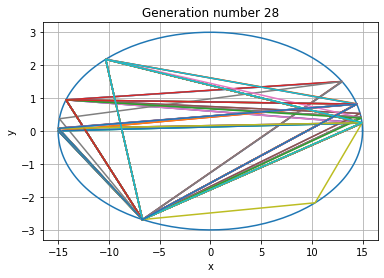

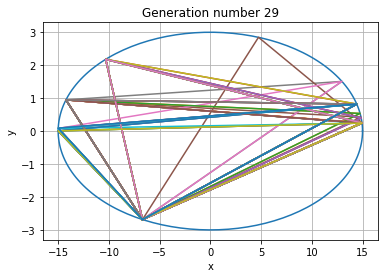

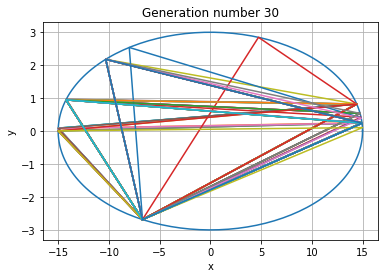

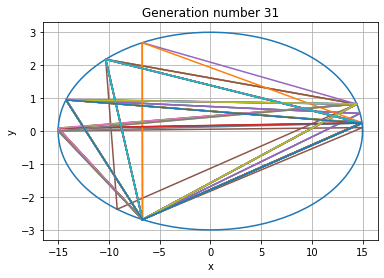

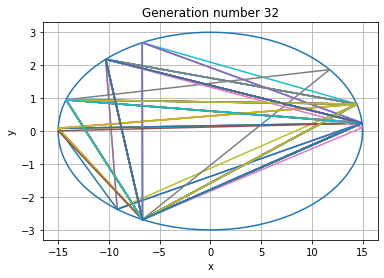

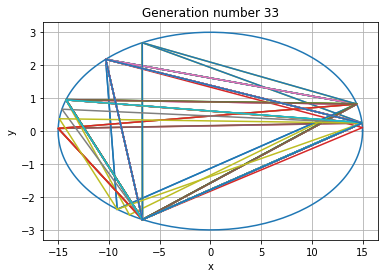

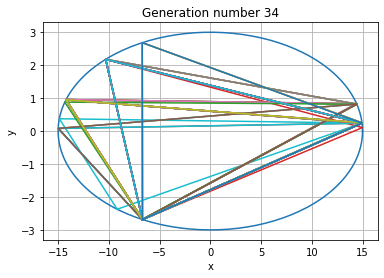

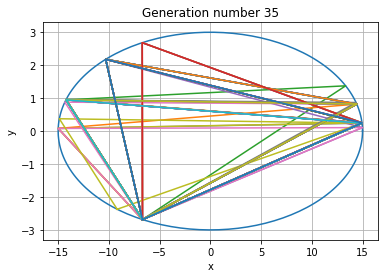

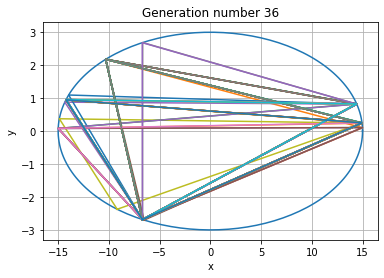

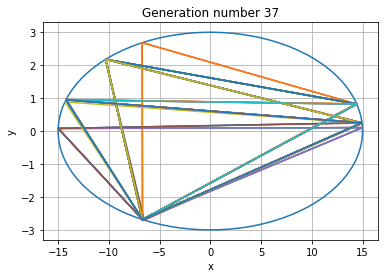

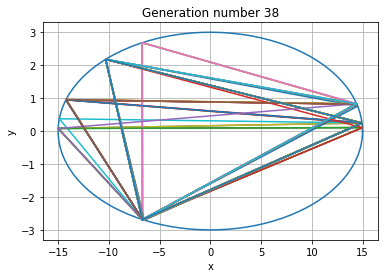

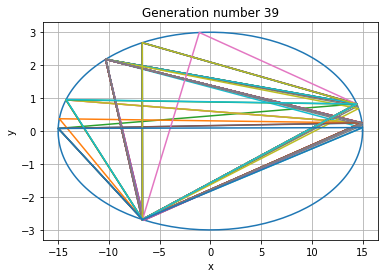

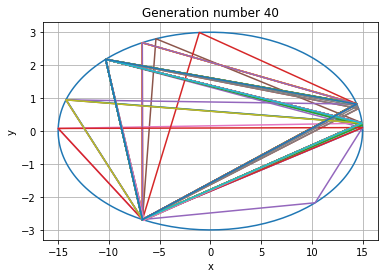

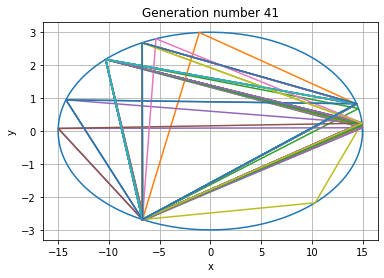

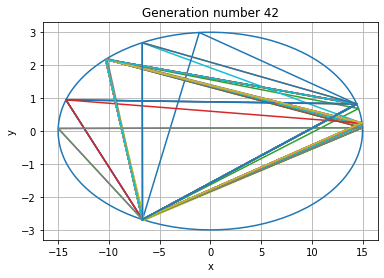

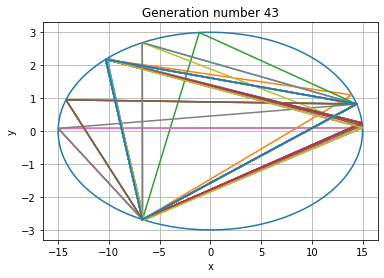

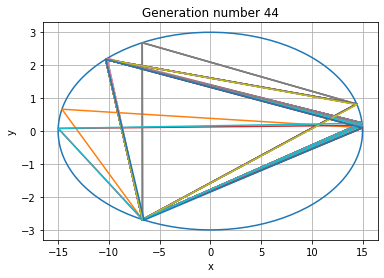

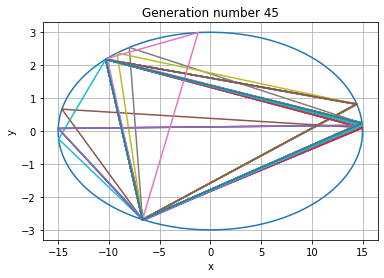

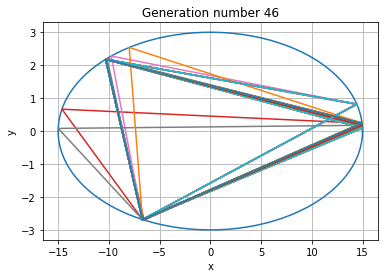

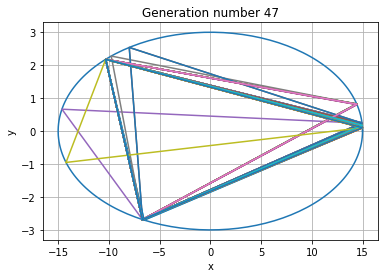

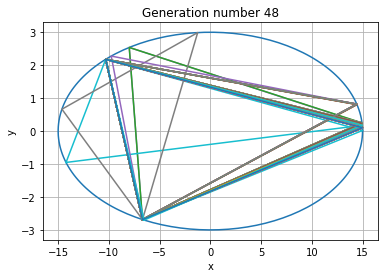

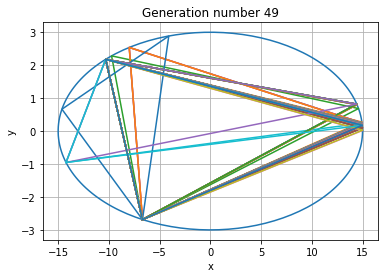

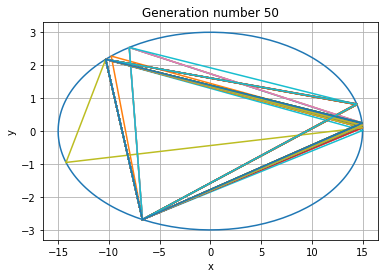

In [21]:
# Initial population
generation = []
for i in range(N):
  generation.append(np.binary_repr(np.random.randint(2**L), L))

areas = []
for i in range(N):
  areas.append(fitness_function(generation[i]))

condition = 0
num_of_gens = 0
max_areas = []
while condition==0:
  num_of_gens+=1

  # new population
  old_generation = copy.deepcopy(generation)
  generation = []
  N_reproduction = round((1-G)*N) # number of old instances in the new population
  N_crossover = N - N_reproduction # number of new instances in the new population formed by crossover and mutation

  if N_reproduction % 2 == 1: # we want even numbers because crossover generates 2 children - see function crossover()
    N_reproduction+=1
    N_crossover-=1

  # reproduction - by roulette wheel
  generation1 = roulette_wheel(old_generation, areas, N_reproduction)

  # crossover
  generation2 = crossover(old_generation, areas, N_crossover, pc)
  generation = generation1 + generation2
  
  # mutation
  for i in range(round(pm*N*L)): # pm*N*L is the number of genes to be mutated
    mutation_instance = np.random.randint(N)
    mutation_point = np.random.randint(36)
    if generation[mutation_instance][mutation_point] == '0':
      generation[mutation_instance] = change_char(generation[mutation_instance], mutation_point, '1')
    else:
      generation[mutation_instance] = change_char(generation[mutation_instance], mutation_point, '0')

  # evaluation of the population
  areas = []
  for i in range(N):
    areas.append(fitness_function(generation[i]))
  
  max_areas.append(max(areas))

  plot_gen(generation, N, num_of_gens)

  # stop condition
  if num_of_gens >= 50:
    condition = 1



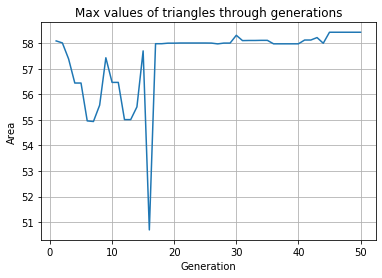

In [22]:
plt.plot(np.linspace(1,num_of_gens, num_of_gens), max_areas)
plt.grid()
plt.title('Max values of triangles through generations')
plt.xlabel('Generation')
plt.ylabel('Area')
plt.show()